## Convolutional Neural Network - MNIST Dataset

Using the MNIST dataset - The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems (Source - https://en.wikipedia.org/wiki/MNIST_database) 

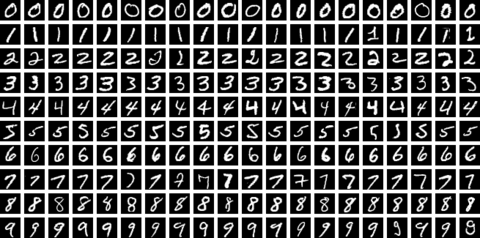

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
print(f"Length of X_train - {len(X_train)}")
print(f"Length of X_test - {len(X_test)}")

Length of X_train - 60000
Length of X_test - 10000


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### The MNIST dataset contains grayscale images where each pixel has an intensity value between 0 and 255.

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

### Lets see how images are kept in the dataset using a simple function

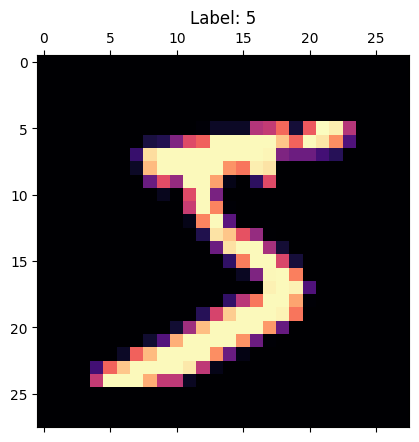

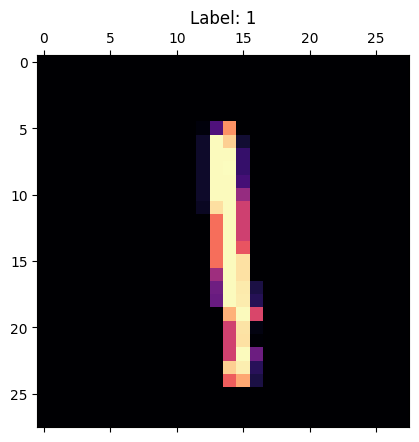

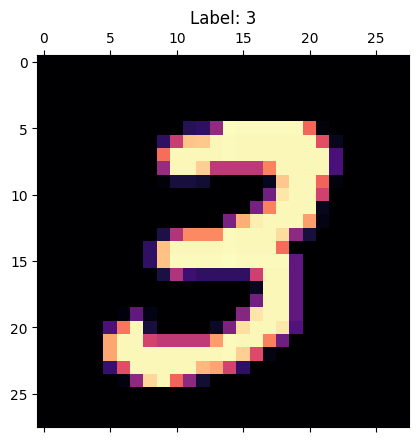

In [10]:
def show_example(X,y,index):
    plt.matshow(X[index], cmap='magma')
    plt.title(f"Label: {y[index]}")
    plt.show()

show_example(X_train,y_train,0)
show_example(X_train,y_train,8)
show_example(X_train,y_train,7)

## A Convolutional Neural Network

#### Normalize the data

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#### Reshaping the data for CNN
CNNs require input data to have a specific format, usually in the shape (batch_size, height, width, channels).
* 'batch size' = -1 means we want the function to automatically add batch size based on the data
* 'height' and 'width' depends on dataset - MNIST dataset have images of size 28 x 28
* 'channels' - MNIST dataset have greyscale images only, so a single channel

In [13]:
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

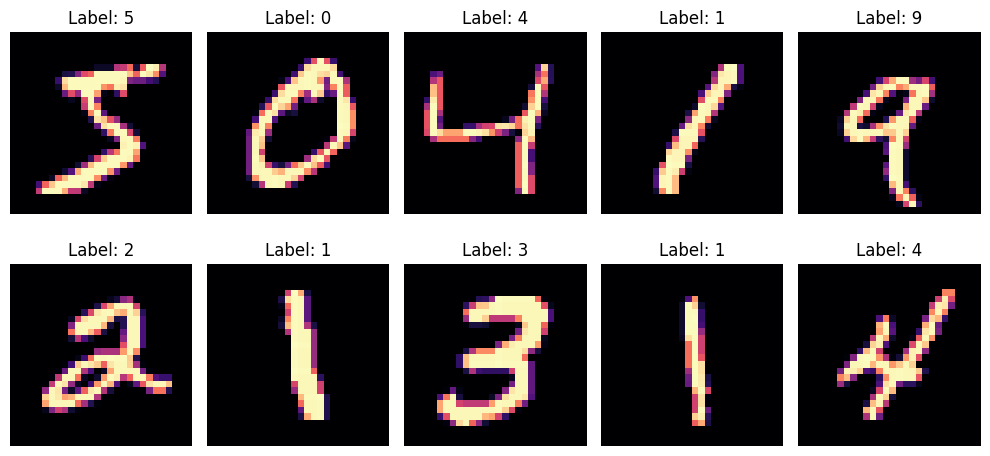

In [15]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='magma')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [17]:
# Suppressing the User Warning (Optional)
import warnings
warnings.filterwarnings('ignore')

model_cnn = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)), # First convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer with 2x2 pool size
    
    Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'),   # Second convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer

    Flatten(),     # Flatten the output before feeding it to fully connected layers
    
    Dense(128, activation='relu'),     # Fully connected layer with 128 neurons
    
    Dense(10, activation='softmax')
])

In [18]:
model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9061 - loss: 0.3171 - val_accuracy: 0.9808 - val_loss: 0.0610
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9847 - loss: 0.0480 - val_accuracy: 0.9880 - val_loss: 0.0419
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9897 - loss: 0.0312 - val_accuracy: 0.9900 - val_loss: 0.0338
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9935 - loss: 0.0220 - val_accuracy: 0.9880 - val_loss: 0.0445
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9952 - loss: 0.0145 - val_accuracy: 0.9882 - val_loss: 0.0492
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9958 - loss: 0.0130 - val_accuracy: 0.9890 - val_loss: 0.0407
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9971 - loss: 0.0083 - val_accuracy: 0.9880 - val_loss: 0.0488
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9977 -

In [22]:
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test)
print(f"CNN Test Loss: {loss_cnn}")
print(f"CNN Test Accuracy: {accuracy_cnn}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9908 - loss: 0.0410
CNN Test Loss: 0.03412304446101189
CNN Test Accuracy: 0.9923999905586243


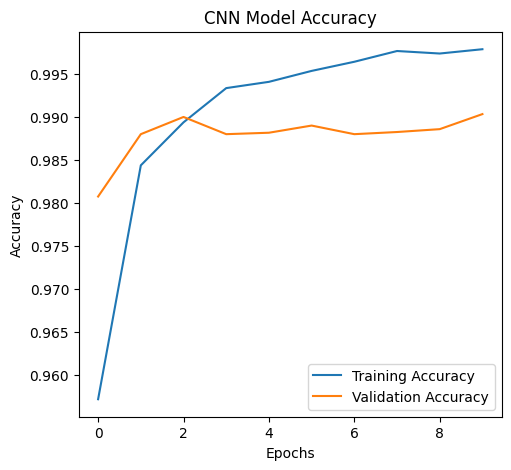

In [27]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

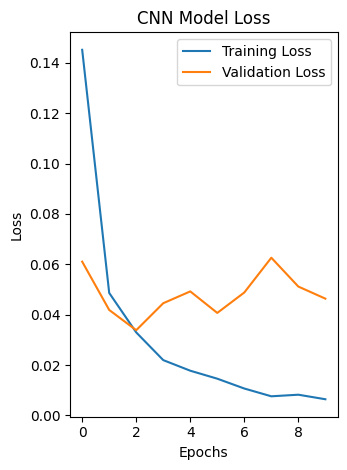

In [28]:
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### A Convolutional Neural Network was designed above, achieving test accuracy of 0.99, hence, outperforming simple Artificial Neural Network

#### Implementation of simple Artificial Neural Network at - "Artificial Neural Network MNIST" in my github repository -
https://github.com/Handa1810/Deep-Learning-Journey